# Import libraries

In [49]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
from warnings import filterwarnings
filterwarnings('ignore')

In [51]:
os.chdir('D:/Data for Project/')

In [52]:
df=pd.read_csv('train_titanic.csv')

In [53]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
df.shape

(891, 12)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# checking for null values

In [56]:
n=df.isna().sum()
n[n>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [57]:
for i in n:
    if i==687:
        print('null values in cabin:',round((i/891)*100,2),'%')

null values in cabin: 77.1 %


In [58]:
# removing cabin because it has more null values

df.drop(['Cabin'],axis=1,inplace=True)

In [59]:
df.shape

(891, 11)

In [60]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
# checking for unique values


In [61]:

uni=df.nunique()
uni[uni>750]

PassengerId    891
Name           891
dtype: int64

In [62]:
df['Ticket'].nunique()

681

In [63]:
df.drop(['Ticket'],axis=1,inplace=True)


In [64]:
df.drop(['PassengerId','Name'],axis=1,inplace=True)

In [65]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Imputing null-values

In [66]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=df[i].fillna(df[i].mode()[0])
    else:
        df[i]=df[i].fillna(df[i].median())

In [67]:
# rechecking for null values

null=df.isna().sum()
null[null>0]

# suggests all values got imputed

Series([], dtype: int64)

In [68]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

## seperating categorical and numerical columns

In [69]:
x_cat=x.select_dtypes(include='object')
x_con=x.select_dtypes(exclude='object')

In [70]:
x_cat

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [71]:
x_con

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,3,28.0,1,2,23.4500
889,1,26.0,0,0,30.0000


## checking for outliers

Pclass
skew: -0.63


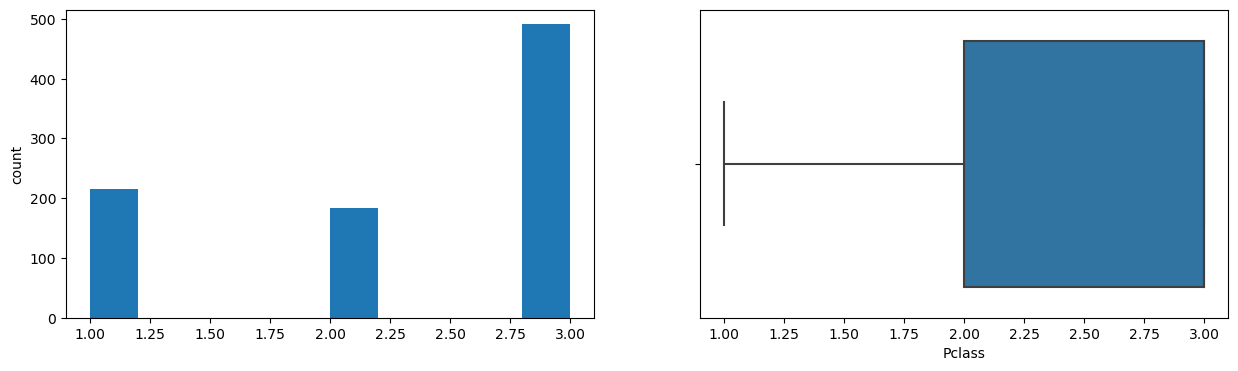

Age
skew: 0.51


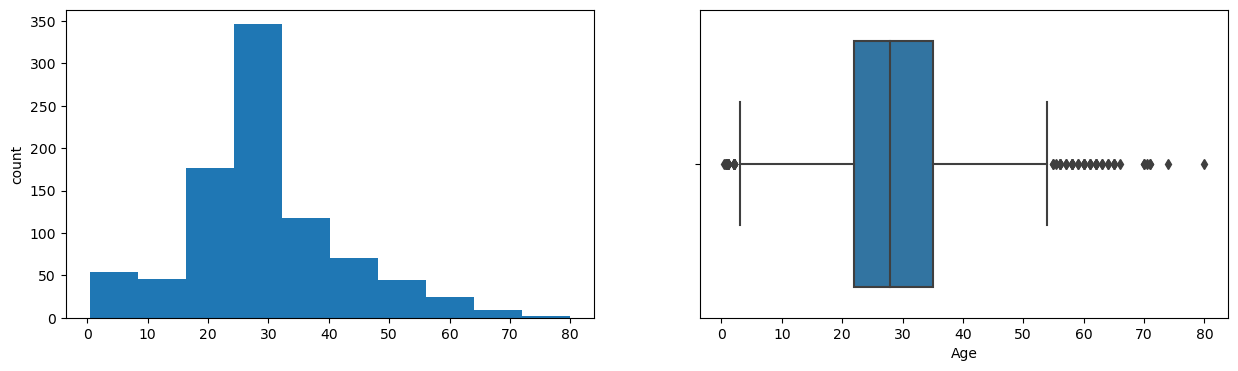

SibSp
skew: 3.7


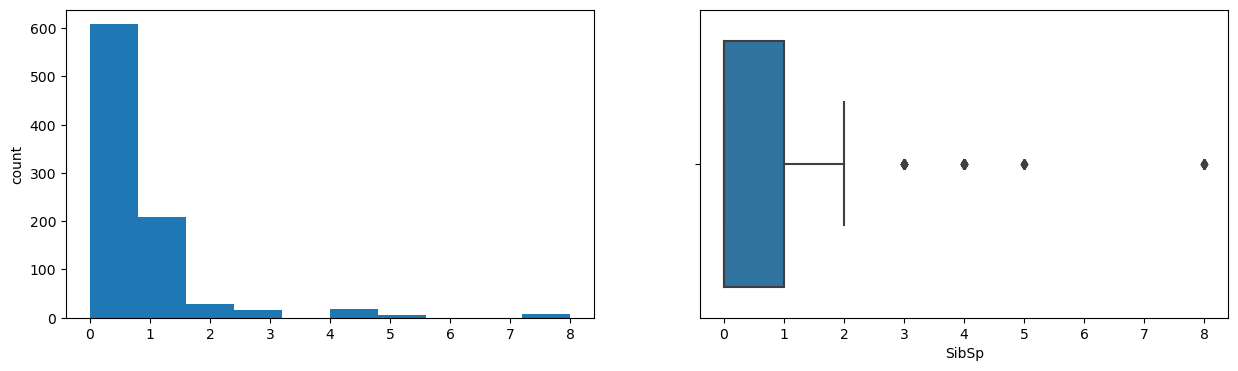

Parch
skew: 2.75


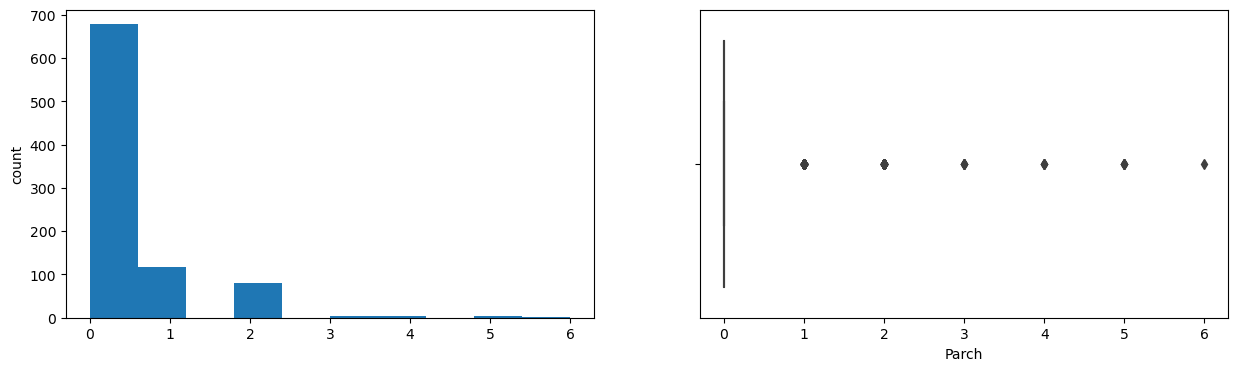

Fare
skew: 4.79


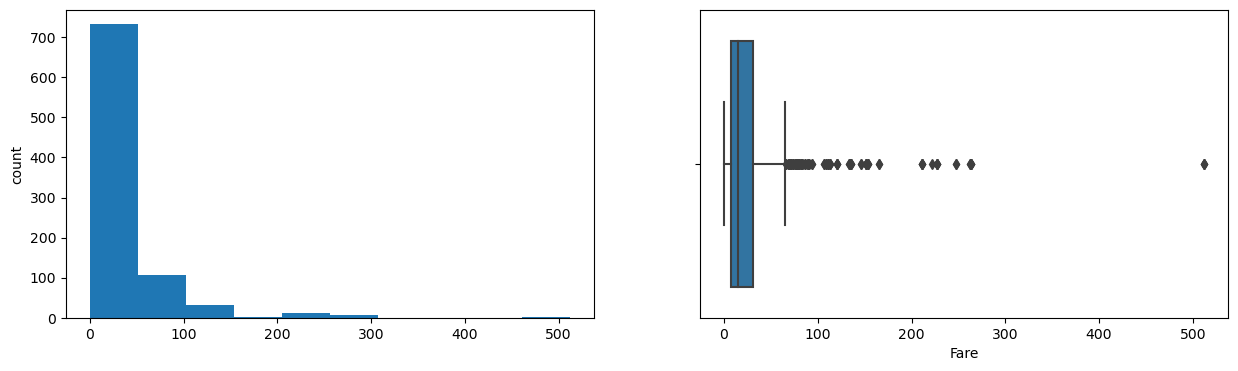

In [72]:
for i in x_con.columns:
    print(i)
    print('skew:',round(df[i].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[i].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[i])
    plt.show()

In [73]:
outlier_columns=['Age','SibSp', 'Fare','Parch']

In [74]:
def remove_outlier(df,columns):
    df_copy=df.copy()
    for i in columns:
        
        Q1=df_copy[i].quantile(0.25)
        Q3=df_copy[i].quantile(0.75)
        
        IQR=Q3-Q1
        
        lower_limit= Q1-1.5*IQR
        upper_limit= Q3+1.5*IQR
        
        df_copy[i]=np.clip(df_copy[i],lower_limit,upper_limit)
        
    return df_copy

In [75]:
df1=remove_outlier(df,outlier_columns)

In [76]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1.0,0,7.2500,S
1,1,1,female,38.0,1.0,0,65.6344,C
2,1,3,female,26.0,0.0,0,7.9250,S
3,1,1,female,35.0,1.0,0,53.1000,S
4,0,3,male,35.0,0.0,0,8.0500,S


In [77]:
x=df1.drop(['Survived'],axis=1)
y=df1['Survived']

In [78]:
x_cat1=x.select_dtypes(include='object')
x_con1=x.select_dtypes(exclude='object')


Pclass
skew: -0.63


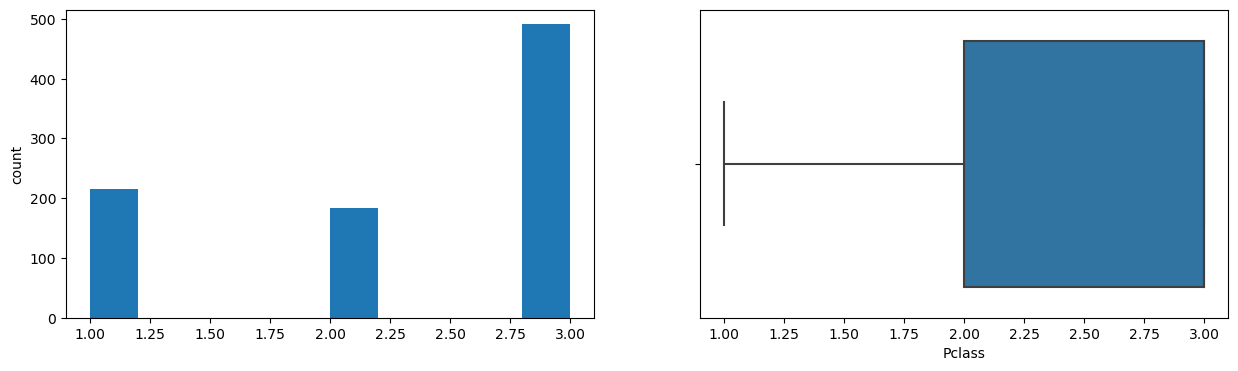

Age
skew: 0.16


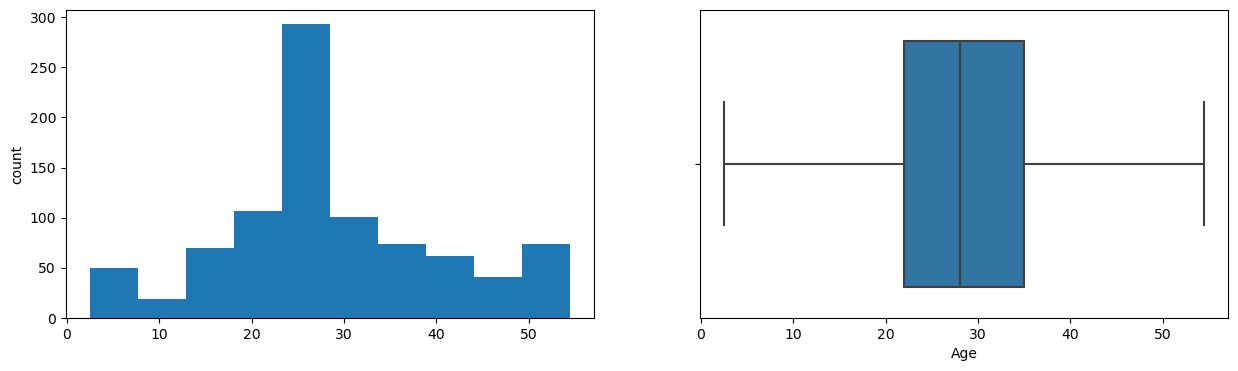

SibSp
skew: 1.62


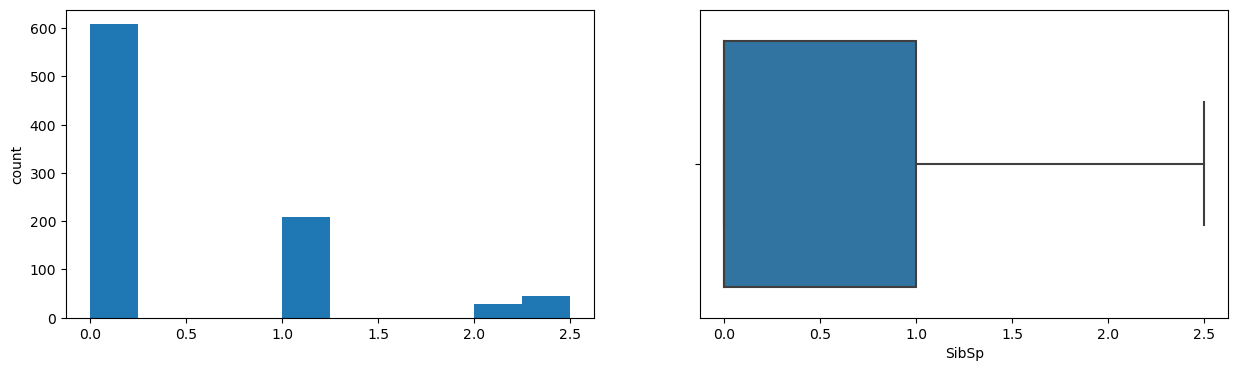

Parch
skew: 0.0


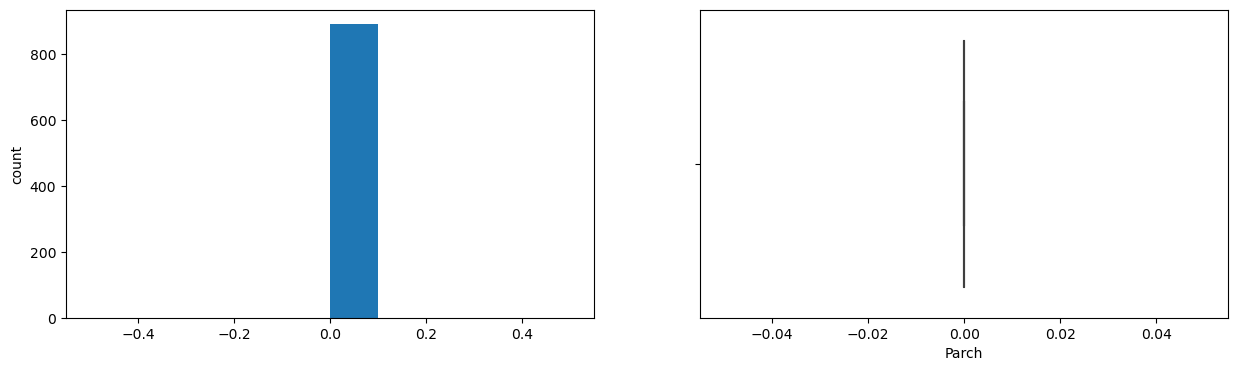

Fare
skew: 1.08


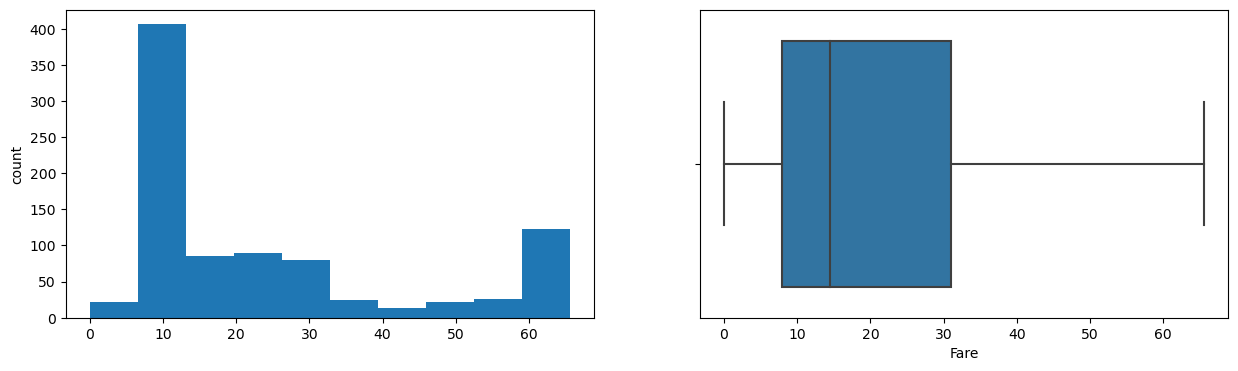

In [79]:
for i in x_con.columns:
    print(i)
    print('skew:',round(df1[i].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df1[i].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df1[i])
    plt.show()

In [ ]:
# Checking for dublicates

In [80]:
duplicate_columns = df1.columns[df1.columns.duplicated()]
print("Number of duplicate columns:", len(duplicate_columns))
print("Duplicate columns:", duplicate_columns)

Number of duplicate columns: 0
Duplicate columns: Index([], dtype='object')


In [35]:
# Descriptive statistics

In [81]:
df1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.0,891.000000
mean,0.383838,2.308642,29.039282,0.426487,0.0,24.046813
std,0.486592,0.836071,12.072074,0.708246,0.0,20.481625
min,0.000000,1.000000,2.500000,0.000000,0.0,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.0,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.0,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.0,31.000000
max,1.000000,3.000000,54.500000,2.500000,0.0,65.634400


In [82]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [83]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1.0,0,7.2500,S
1,1,1,female,38.0,1.0,0,65.6344,C
2,1,3,female,26.0,0.0,0,7.9250,S
3,1,1,female,35.0,1.0,0,53.1000,S
4,0,3,male,35.0,0.0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0.0,0,13.0000,S
887,1,1,female,19.0,0.0,0,30.0000,S
888,0,3,female,28.0,1.0,0,23.4500,S
889,1,1,male,26.0,0.0,0,30.0000,C


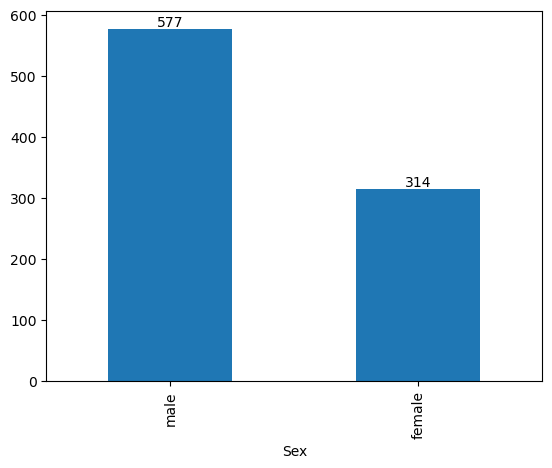

In [84]:
ax=df1['Sex'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

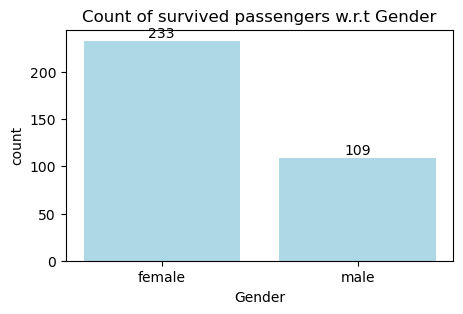

In [85]:
survivors=df1[df1['Survived']==1]

survivor_count=survivors.groupby('Sex').size()
plt.figure(figsize=(5,3))
ax=plt.bar(survivor_count.index,survivor_count.values,color='lightblue')

plt.xlabel('Gender')
plt.ylabel('count')
plt.title('Count of survived passengers w.r.t Gender')

for i, value in enumerate(survivor_count.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

In [86]:
# Total male were 577 out of which only 109 survived
# Total females were 314 out of which 233 survived

print('% of male survived:', round((109*100)/577),'%')
print('% of female survived:', round((233*100)/314),'%')

% of male survived: 19 %
% of female survived: 74 %


Text(0.5, 1.0, 'Count of survived passengers w.r.t Class')

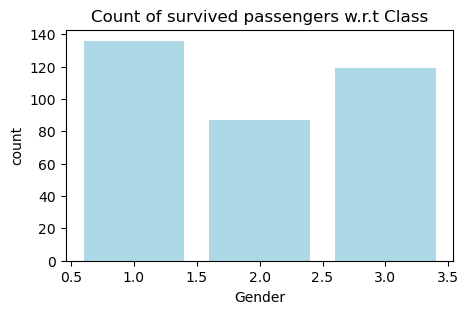

In [87]:
survivors=df1[df1['Survived']==1]

survivor_count=survivors.groupby('Pclass').size()
plt.figure(figsize=(5,3))
ax=plt.bar(survivor_count.index,survivor_count.values,color='lightblue')

plt.xlabel('Gender')
plt.ylabel('count')
plt.title('Count of survived passengers w.r.t Class')



In [ ]:
# univariate categorical analysis


In [89]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
# Encoding

ore=OrdinalEncoder()
x_cat2=ore.fit_transform(x_cat1)
x_cat2

array([[1., 2.],
       [0., 0.],
       [0., 2.],
       ...,
       [0., 2.],
       [1., 0.],
       [1., 1.]])

In [90]:
x_cat2=pd.DataFrame(x_cat2,columns=ore.get_feature_names_out())
x_cat2

,Sex,Embarked
0,1.0,2.0
1,0.0,0.0
2,0.0,2.0
3,0.0,2.0
4,1.0,2.0
...,...,...
886,1.0,2.0
887,0.0,2.0
888,0.0,2.0
889,1.0,0.0


In [91]:
# Scaling

ss=StandardScaler()
x_con2=pd.DataFrame(ss.fit_transform(x_con1),columns=ss.get_feature_names_out())
x_con2

,Pclass,Age,SibSp,Parch,Fare
0,0.827377,-0.583432,0.810220,0.0,-0.820552
1,-1.566107,0.742685,0.810220,0.0,2.031623
2,0.827377,-0.251903,-0.602512,0.0,-0.787578
3,-1.566107,0.494038,0.810220,0.0,1.419297
4,0.827377,0.494038,-0.602512,0.0,-0.781471
...,...,...,...,...,...
886,-0.369365,-0.169020,-0.602512,0.0,-0.539655
887,-1.566107,-0.832079,-0.602512,0.0,0.290823
888,0.827377,-0.086138,0.810220,0.0,-0.029155
889,-1.566107,-0.251903,-0.602512,0.0,0.290823


In [92]:
x1=x_con2.join(x_cat2)
x1

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0.827377,-0.583432,0.810220,0.0,-0.820552,1.0,2.0
1,-1.566107,0.742685,0.810220,0.0,2.031623,0.0,0.0
2,0.827377,-0.251903,-0.602512,0.0,-0.787578,0.0,2.0
3,-1.566107,0.494038,0.810220,0.0,1.419297,0.0,2.0
4,0.827377,0.494038,-0.602512,0.0,-0.781471,1.0,2.0
...,...,...,...,...,...,...,...
886,-0.369365,-0.169020,-0.602512,0.0,-0.539655,1.0,2.0
887,-1.566107,-0.832079,-0.602512,0.0,0.290823,0.0,2.0
888,0.827377,-0.086138,0.810220,0.0,-0.029155,0.0,2.0
889,-1.566107,-0.251903,-0.602512,0.0,0.290823,1.0,0.0


In [94]:
# feature selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [95]:
lo=LogisticRegression()
sfs=SequentialFeatureSelector(lo,n_features_to_select=6)
sfs.fit_transform(x1,y)

array([[ 0.82737724, -0.58343208,  0.81022003,  0.        ,  1.        ,
         2.        ],
       [-1.56610693,  0.74268522,  0.81022003,  0.        ,  0.        ,
         0.        ],
       [ 0.82737724, -0.25190275, -0.60251196,  0.        ,  0.        ,
         2.        ],
       ...,
       [ 0.82737724, -0.08613809,  0.81022003,  0.        ,  0.        ,
         2.        ],
       [-1.56610693, -0.25190275, -0.60251196,  0.        ,  1.        ,
         0.        ],
       [ 0.82737724,  0.24539123, -0.60251196,  0.        ,  1.        ,
         1.        ]])

In [96]:
sfs_cols=sfs.get_feature_names_out()

In [97]:
x2=pd.DataFrame(x,columns=sfs_cols)
x2

,Pclass,Age,SibSp,Parch,Sex,Embarked
0,3,22.0,1.0,0,male,S
1,1,38.0,1.0,0,female,C
2,3,26.0,0.0,0,female,S
3,1,35.0,1.0,0,female,S
4,3,35.0,0.0,0,male,S
...,...,...,...,...,...,...
886,2,27.0,0.0,0,male,S
887,1,19.0,0.0,0,female,S
888,3,28.0,1.0,0,female,S
889,1,26.0,0.0,0,male,C


In [98]:
# Preprocessing
cat5=[]
con5=[]

for i in x2.columns:
    if x[i].dtypes=='object':
        cat5.append(i)
    else:
        con5.append(i)

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [100]:
# Con_pipe:
con_pipe=Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),('Scale',StandardScaler())])
# cat_pipe
cat_pipe=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),('encode',OrdinalEncoder())])
# column_transfer

pre=ColumnTransformer([('cat_pipe',cat_pipe,cat5),('con_pipe',con_pipe,con5)])

In [101]:
x3=pre.fit_transform(x2)
x3

array([[ 1.        ,  2.        ,  0.82737724, -0.58343208,  0.81022003,
         0.        ],
       [ 0.        ,  0.        , -1.56610693,  0.74268522,  0.81022003,
         0.        ],
       [ 0.        ,  2.        ,  0.82737724, -0.25190275, -0.60251196,
         0.        ],
       ...,
       [ 0.        ,  2.        ,  0.82737724, -0.08613809,  0.81022003,
         0.        ],
       [ 1.        ,  0.        , -1.56610693, -0.25190275, -0.60251196,
         0.        ],
       [ 1.        ,  1.        ,  0.82737724,  0.24539123, -0.60251196,
         0.        ]])

In [102]:
pre_cols=pre.get_feature_names_out()

In [103]:
x3=pd.DataFrame(x3,columns=pre_cols)
x3

,cat_pipe__Sex,cat_pipe__Embarked,con_pipe__Pclass,con_pipe__Age,con_pipe__SibSp,con_pipe__Parch
0,1.0,2.0,0.827377,-0.583432,0.810220,0.0
1,0.0,0.0,-1.566107,0.742685,0.810220,0.0
2,0.0,2.0,0.827377,-0.251903,-0.602512,0.0
3,0.0,2.0,-1.566107,0.494038,0.810220,0.0
4,1.0,2.0,0.827377,0.494038,-0.602512,0.0
...,...,...,...,...,...,...
886,1.0,2.0,-0.369365,-0.169020,-0.602512,0.0
887,0.0,2.0,-1.566107,-0.832079,-0.602512,0.0
888,0.0,2.0,0.827377,-0.086138,0.810220,0.0
889,1.0,0.0,-1.566107,-0.251903,-0.602512,0.0


In [104]:
# Train test split

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
x_train,x_test,y_train,y_test=train_test_split(x3,y,random_state=21,test_size=0.2)

In [105]:
# Model building

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [106]:
lo=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
ada=AdaBoostClassifier()
knn=KNeighborsClassifier()
sv=SVC()

In [107]:
model=[lo,dt,rf,ada,knn,sv]

In [108]:
for i in model:
    i.fit(x_train,y_train)
    y_pred_tr=i.predict(x_train)
    y_pred_ts=i.predict(x_test)
    print('model:',i)
    print('Training:')
    from sklearn.metrics import f1_score,accuracy_score
    f1_tr=f1_score(y_pred_tr,y_train)
    print('f1_tr:',f1_tr)
    acc_tr=accuracy_score(y_pred_tr,y_train)
    print('acc_tr:',acc_tr)
    print('__'*60)

model: LogisticRegression()
Training:
f1_tr: 0.72936660268714
acc_tr: 0.8019662921348315
________________________________________________________________________________________________________________________
model: DecisionTreeClassifier()
Training:
f1_tr: 0.8866396761133604
acc_tr: 0.9213483146067416
________________________________________________________________________________________________________________________
model: RandomForestClassifier()
Training:
f1_tr: 0.8906250000000001
acc_tr: 0.9213483146067416
________________________________________________________________________________________________________________________
model: AdaBoostClassifier()
Training:
f1_tr: 0.7542213883677299
acc_tr: 0.8160112359550562
________________________________________________________________________________________________________________________
model: KNeighborsClassifier()
Training:
f1_tr: 0.7510373443983402
acc_tr: 0.8314606741573034
_____________________________________________________

In [ ]:
# Hyperparameter tuning

In [109]:
grid={
    
    'max_depth':range(1,100),
    'min_samples_split':range(1,20),
    'min_samples_leaf':range(1,20),
   
}

In [110]:
rs=RandomizedSearchCV(dt,grid,cv=4)

In [111]:
rs.fit(x_train,y_train)

RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': range(1, 100),
                                        'min_samples_leaf': range(1, 20),
                                        'min_samples_split': range(1, 20)})

In [112]:
rs.best_params_


{'min_samples_split': 15, 'min_samples_leaf': 10, 'max_depth': 13}

In [113]:
dt1=DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=2,max_depth=4)

In [114]:
dt1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=5)

In [115]:
# Evaluation
y_pred=dt1.predict(x_test)

In [116]:
from sklearn.metrics import confusion_matrix,classification_report
acc=accuracy_score(y_pred,y_test)
print('accuracy:',round(acc,2))

clas=classification_report(y_pred,y_test)
print('classification_report:',clas)
conf=confusion_matrix(y_pred,y_test)
print('confusion_matrix:\n',conf)

accuracy: 0.81
classification_report:               precision    recall  f1-score   support

           0       0.94      0.78      0.85       127
           1       0.62      0.88      0.73        52

    accuracy                           0.81       179
   macro avg       0.78      0.83      0.79       179
weighted avg       0.85      0.81      0.82       179

confusion_matrix:
 [[99 28]
 [ 6 46]]


In [117]:
# importing new data
df_new=pd.read_csv('test_titanic.csv')
df_new

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [118]:
x_t=pre.transform(df_new)
x_t

array([[ 1.        ,  1.        ,  0.82737724,  0.45259706, -0.60251196,
         0.        ],
       [ 0.        ,  2.        ,  0.82737724,  1.4886262 ,  0.81022003,
         0.        ],
       [ 1.        ,  1.        , -0.36936484,  2.73186117, -0.60251196,
         0.        ],
       ...,
       [ 1.        ,  2.        ,  0.82737724,  0.78412639, -0.60251196,
         0.        ],
       [ 1.        ,  2.        ,  0.82737724, -0.08613809, -0.60251196,
         0.        ],
       [ 1.        ,  0.        ,  0.82737724, -0.08613809,  0.81022003,
         1.        ]])

In [119]:
x_new=pd.DataFrame(x_t,columns=pre.get_feature_names_out())
x_new


,cat_pipe__Sex,cat_pipe__Embarked,con_pipe__Pclass,con_pipe__Age,con_pipe__SibSp,con_pipe__Parch
0,1.0,1.0,0.827377,0.452597,-0.602512,0.0
1,0.0,2.0,0.827377,1.488626,0.810220,0.0
2,1.0,1.0,-0.369365,2.731861,-0.602512,0.0
3,1.0,2.0,0.827377,-0.169020,-0.602512,0.0
4,0.0,2.0,0.827377,-0.583432,0.810220,1.0
...,...,...,...,...,...,...
413,1.0,2.0,0.827377,-0.086138,-0.602512,0.0
414,0.0,0.0,-1.566107,0.825568,-0.602512,0.0
415,1.0,2.0,0.827377,0.784126,-0.602512,0.0
416,1.0,2.0,0.827377,-0.086138,-0.602512,0.0


In [120]:
# Prediction
pred1=dt1.predict(x_new)
pred1

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [121]:
tsp=df_new[['PassengerId','Name']]

In [122]:
tsp['survival_prediction']=pred1

In [123]:
tsp.to_csv('titanic_survival_predictions.csv',index=None)